A study on the permutation importance of features where some of them belong to the same clusters

In [4]:
print(__doc__)
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split


Automatically created module for IPython interactive environment


In [12]:
data = load_breast_cancer()
X, y = data.data, data.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
clf = RandomForestClassifier(n_estimators=100, random_state = 42)
clf.fit(X_train,y_train)
print('Accuracy on test data: {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy on test data: 0.97


In [15]:
# Tree based feature importance and the permutation importance
import numpy as np
result = permutation_importance(clf, X_train, y_train, n_repeats = 10, random_state = 42)
perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


In [23]:
tree_indices = np.arange(0, len(clf.feature_importances_)) + .5


C:\Users\Van Tai Nguyen\Anaconda3\envs\Operator\lib\site-packages\ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


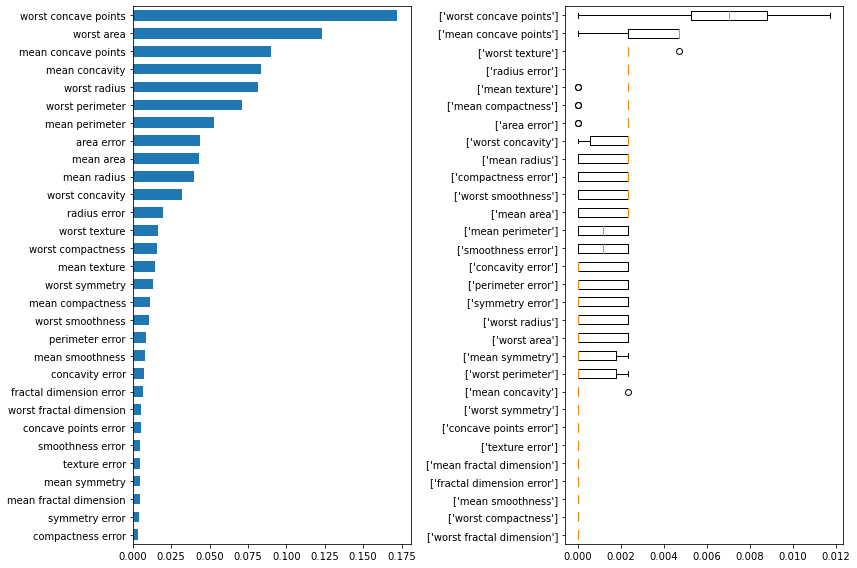

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height = .6)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert = False, labels = data.feature_names.reshape(30,1)[perm_sorted_idx])
fig.tight_layout()
plt.show()

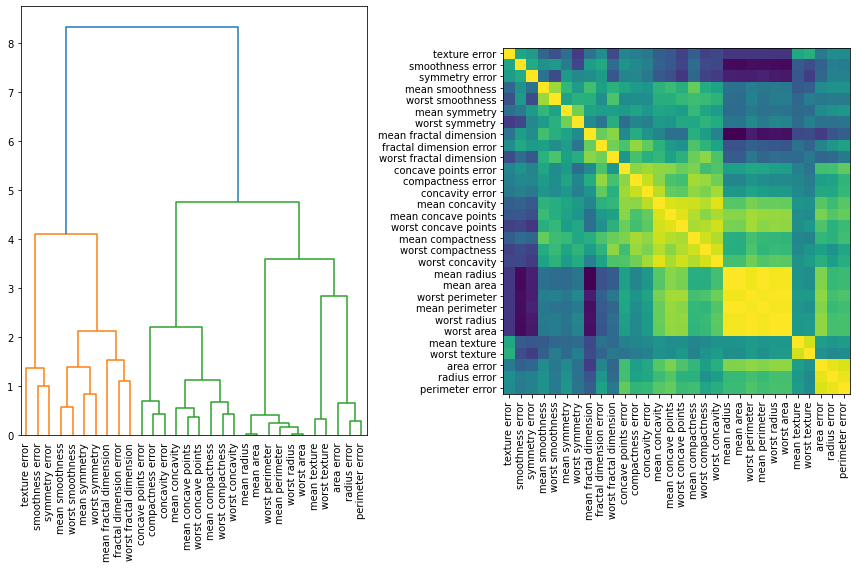

In [151]:
# Plotting the heatmap of the correlated features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels = data.feature_names.tolist(), ax=ax1, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation = 'vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()


In [162]:
dendro

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [142.5, 142.5, 172.5, 172.5],
  [112.5, 112.5, 157.5, 157.5],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [200.0, 200.0, 223.75, 223.75],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [211.875, 211.875, 271.25, 271.25],
  [135.0, 135.0, 241.5625, 241.5625],
  [39.375, 39.375, 188.28125, 188.28125]],
 'dcoord': [[0.0, 1.004434765509078, 1.004434765509078, 0.0],
  [0.0, 1.3

In [166]:
len(dendro['ivl'])

30

In [158]:
cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion = 'distance')
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]
clf_sel = RandomForestClassifier(n_estimators = 100, random_state = 42)
clf_sel.fit(X_train_sel, y_train)
print('Accuracy on test data with features removed: {:.2f}'.format(clf_sel.score(X_test_sel, y_test)))

Accuracy on test data with features removed: 0.97


In [161]:
cluster_id_to_feature_ids.values()

dict_values([[0, 2, 3, 20, 22, 23], [1, 21], [4, 24], [5, 25, 26], [6, 7, 27], [8, 28], [9], [10, 12, 13], [11], [14], [15, 16, 17], [18], [19], [29]])

In [78]:
aab = result.importances[0]

In [80]:
a = np.array([1,2,3])

ValueError: Dimensions of labels and X must be compatible

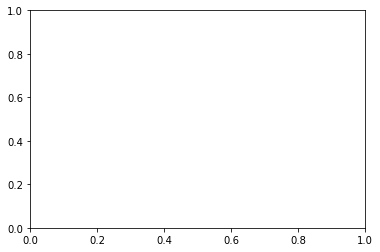

In [95]:
plt.boxplot(a, labels = ['this',1][0])

In [94]:
['this',1][0]

'this'